# Data Exploration

In [1]:
using Printf
using StatsBase
using Plots

In [2]:
include("../../common/vocab.jl")

preprocess (generic function with 1 method)

## Data

In [3]:
filepath = "../../datasets/shakespeare_plays.txt"

"../../datasets/shakespeare_plays.txt"

In [4]:
text = open(filepath) do file
    read(file, String)
end

"\nCOUNTESS.\nIn delivering my son from me, I bury a second husband.\n\nBERTRAM.\nAnd I in going, madam, weep o’er my father’s death anew; but I must\nattend his majesty’s command, to whom I am now in ward, evermore in\nsubjection.\n\nLAFEW.\nYou shall find of the king a husband," ⋯ 5020688 bytes ⋯ "o the king, whom heavens directing,\nIs troth-plight to your daughter. Good Paulina,\nLead us from hence; where we may leisurely\nEach one demand, and answer to his part\nPerform’d in this wide gap of time, since first\nWe were dissever’d. Hastily lead away!\n\n [_Exeunt._]\n"

## Statistics

In [5]:
println("lines:      ", count('\n', text))
println("passages:   ", count("\n\n", text))
println("characters: ", length(text))
println("words:      ", count(r"\w+", text))

lines:      182027
passages:   38409
characters: 4963197
words:      921816


In [6]:
lines = split(text, '\n');
passages = split(text, "\n\n");

### Passages

In [7]:
idx = rand(1:length(passages))
println(passages[idx])

FERDINAND.
A thousand thousand!


mean: 127.22 std: 189.73

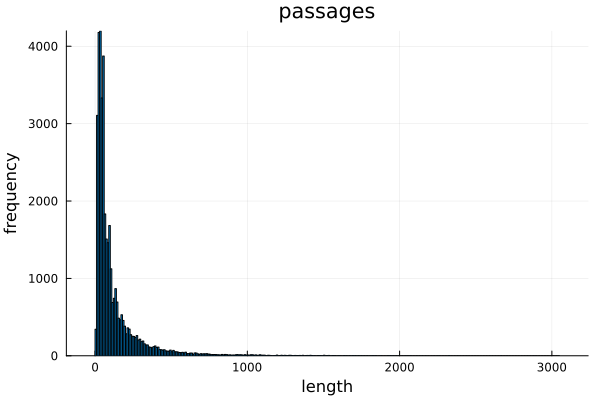

In [8]:
passage_lengths = length.(passages)
@printf "mean: %.2f std: %.2f" mean(passage_lengths) std(passage_lengths)
histogram(passage_lengths,
    label="", xlabel="length", ylabel="frequency", title="passages"
)

In [9]:
for p in 10:10:100
    @printf "%3d%%: %7.2f\n" p percentile(passage_lengths, p)
end

 10%:   21.00
 20%:   30.00
 30%:   39.00
 40%:   50.00
 50%:   60.00
 60%:   84.00
 70%:  113.00
 80%:  172.00
 90%:  296.00
100%: 3047.00


### Lines

In [10]:
idx = rand(1:length(lines))
println(lines[idx])

Come down; behold no more.


mean: 26.27 std: 21.13

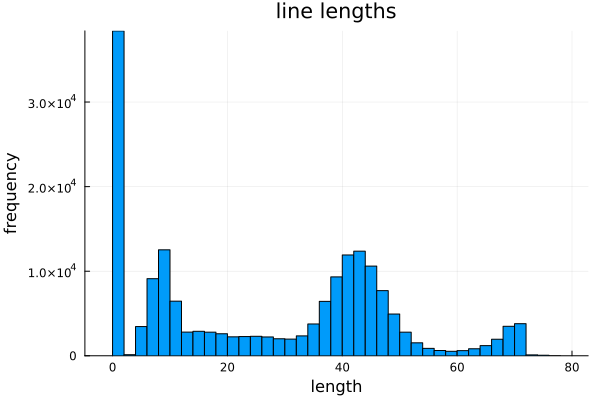

In [11]:
line_lengths = length.(lines)
@printf "mean: %.2f std: %.2f" mean(line_lengths) std(line_lengths)
histogram(line_lengths,
        label="", xlabel="length", ylabel="frequency", title="line lengths"
)

In [12]:
for p in 10:10:100
    @printf "%3d%%: %7.2f\n" p percentile(line_lengths[line_lengths .> 0], p)
end

 10%:    8.00
 20%:   10.00
 30%:   20.00
 40%:   33.00
 50%:   38.00
 60%:   41.00
 70%:   43.00
 80%:   46.00
 90%:   53.00
100%:   77.00


mean: 5.06 std: 4.32

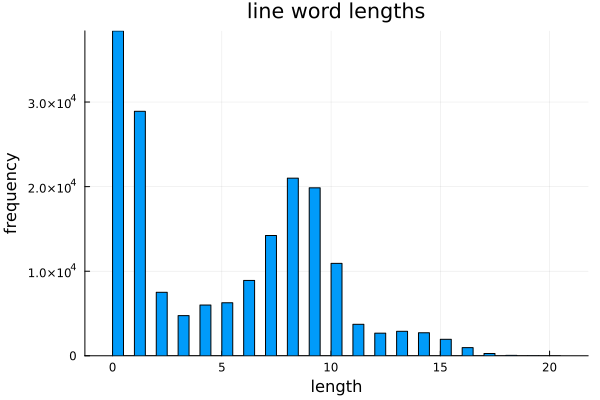

In [13]:
line_word_lengths = map(text -> count(r"\w+", text), split(text, '\n'))
@printf "mean: %.2f std: %.2f" mean(line_word_lengths) std(line_word_lengths)
histogram(line_word_lengths,
        label="", xlabel="length", ylabel="frequency", title="line word lengths"
)

### Characters

In [14]:
characters = sort(collect(Set(text)))
println(length(characters))
join(characters)

71


"\n !(),-.:;?ABCDEFGHIJKLMNOPQRSTUVWXYZ[]_abcdefghijklmnopqrstuvwxyz—‘’“”"

In [15]:
character_counts = sort(collect(countmap(text)), by=x->x[2]);

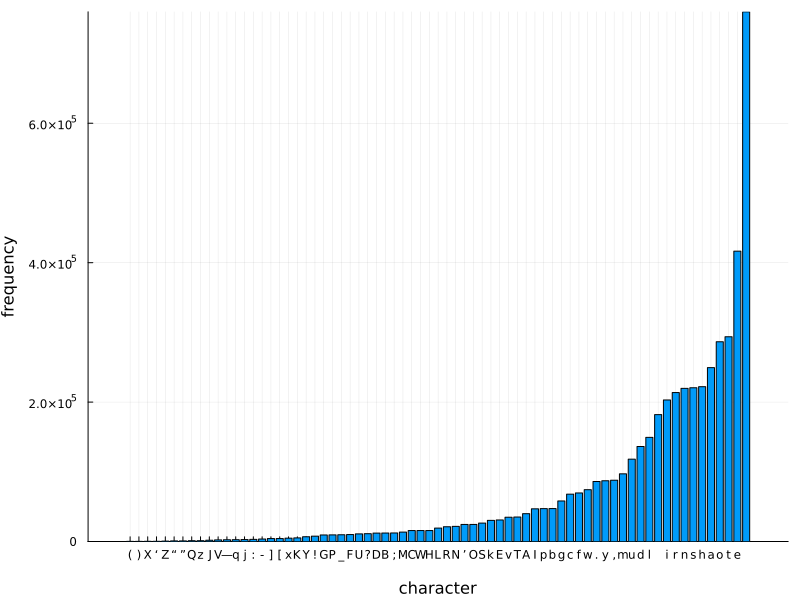

In [16]:
x = [pair[1] for pair in character_counts]
y = [pair[2] for pair in character_counts]
bar(y, 
    xticks=(1.0:length(x), x),
    label="",
    xlabel="character",
    ylabel="frequency",
    size=(800, 600),
)

### Words

In [17]:
using DataStructures

In [18]:
word_frequencies = DefaultDict{String, Int}(0)

DefaultDict{String, Int64, Int64}()

In [19]:
pattern = r"\w+"
for m in eachmatch(pattern, text)
    word_frequencies[m.match] += 1
end

In [20]:
freqs = collect(values(word_frequencies))
@printf  "words: %d\n" length(word_frequencies)
@printf  "max:   %d\n" maximum(freqs)
@printf  "mean:  %.2f\n" mean(freqs)
@printf  "std:   %.2f\n" std(freqs)
@printf  "mode:  %.2f\n" mode(freqs)

words: 30040
max:   23467
mean:  30.69
std:   357.61
mode:  1.00


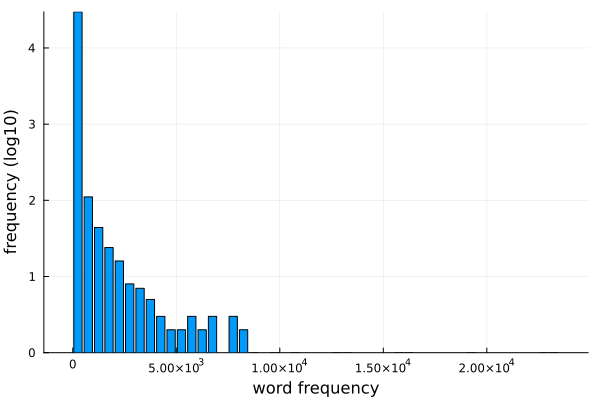

In [21]:
h = fit(Histogram, freqs, nbins=100)
p1 = bar(
    h.edges,
    log10.(h.weights),
    label="",
    xlabel="word frequency",
    ylabel="frequency (log10)",
)